In [1]:
from prody import *

from matplotlib.pylab import *
ion()

C:\Users\zcemcel\AppData\Local\anaconda3\envs\prody\lib\site-packages\prody\utilities\misctools.py:424: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [38]:
# Gene
gene = "PTPN11"

# Dictionary of PDB IDs for each gene
pdb_ids = {
    "PTPN11": "2SHP", 
}

enm_cutoffs = {"2SHP": "", #and resnum 2 to 216
               }



In [40]:
calphas.getResnames()  # first 10 residue names
#calphas.getResnums()[:10]   # first 10 residue numbers


array(['LYS', 'SER', 'ARG', 'ARG', 'TRP', 'PHE', 'HIS', 'PRO', 'ASN',
       'ILE', 'THR', 'GLY', 'VAL', 'GLU', 'ALA', 'GLU', 'ASN', 'LEU',
       'LEU', 'LEU', 'THR', 'ARG', 'GLY', 'VAL', 'ASP', 'GLY', 'SER',
       'PHE', 'LEU', 'ALA', 'ARG', 'PRO', 'SER', 'LYS', 'SER', 'ASN',
       'PRO', 'GLY', 'ASP', 'LEU', 'THR', 'LEU', 'SER', 'VAL', 'ARG',
       'ARG', 'ASN', 'GLY', 'ALA', 'VAL', 'THR', 'HIS', 'ILE', 'LYS',
       'ILE', 'GLN', 'ASN', 'THR', 'GLY', 'ASP', 'TYR', 'TYR', 'ASP',
       'LEU', 'TYR', 'GLY', 'GLY', 'GLU', 'LYS', 'PHE', 'ALA', 'THR',
       'LEU', 'ALA', 'GLU', 'LEU', 'VAL', 'GLN', 'TYR', 'TYR', 'MET',
       'GLU', 'HIS', 'HIS', 'GLY', 'GLN', 'LEU', 'LYS', 'GLU', 'LYS',
       'ASN', 'GLY', 'ASP', 'VAL', 'ILE', 'GLU', 'LEU', 'LYS', 'TYR',
       'PRO', 'LEU', 'ASN', 'CYS', 'ALA', 'ASP', 'PRO', 'THR', 'SER',
       'GLU', 'ARG', 'TRP', 'PHE', 'HIS', 'GLY', 'HIS', 'LEU', 'SER',
       'GLY', 'LYS', 'GLU', 'ALA', 'GLU', 'LYS', 'LEU', 'LEU', 'THR',
       'GLU', 'LYS',

In [39]:
# Apply chain and cutoff selection
pdb_id = pdb_ids.get(gene)
structure = parsePDB(pdb_id)
calphas = structure.select(f"calpha and chain A {enm_cutoffs[pdb_id]}")
calphas

@> Connecting wwPDB FTP server RCSB PDB (USA).
@> Downloading PDB files via FTP failed, trying HTTP.
@> 2shp downloaded (C:\Users\zcemcel\...\2shp.pdb.gz)
@> PDB download via HTTP completed (1 downloaded, 0 failed).
@> 12167 atoms and 1 coordinate set(s) were parsed in 0.27s.


<Selection: 'calpha and chain A ' from 2SHP (491 atoms)>

In [41]:
# Build GNM and calculate modes
gnm = GNM(pdb_id)
gnm.buildKirchhoff(calphas)
n_calpha = calphas.numAtoms()
gnm.calcModes(n_calpha - 1)  # internal modes are n-1. 1 is trivial (0, translation + rotation)


@> Kirchhoff was built in 0.03s.
@> 490 modes were calculated in 0.06s.


In [42]:
slowest_mode = gnm[0]


In [43]:
resnums = calphas.getResnums()
mode2_hinges = calcHinges(gnm[0])
resnums[mode2_hinges]

array([  3,  13,  18,  20,  22,  24,  29,  32, 100, 221, 250, 251, 255,
       257])

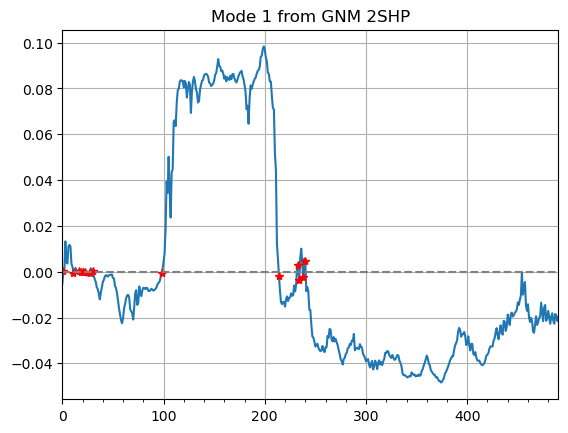

In [44]:
showMode(gnm[0], hinges=True, zero=True);

grid();

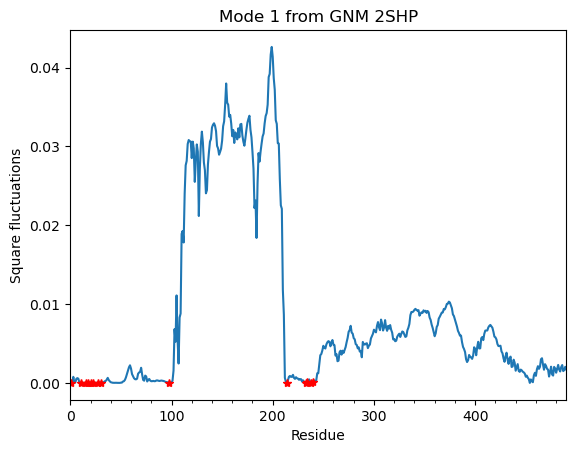

In [45]:
showSqFlucts(gnm[0], hinges=True);